# Market Basket Analysis For e-Commerce Store


`Market Basket Analysis` is a technique used by large retailers to uncover associations between items. It works by looking for combinations of items that occur together frequently in transactions, providing information to understand the purchase behavior. 
The outcome of this type of technique is, in simple terms, a set of rules that can be understood as “if this, then that”

Understanding these buying patterns can help to increase sales in several ways. If there is a pair of items, X and Y, that are frequently bought together:

> Both X and Y can be placed on the same shelf, so that buyers of one item would be prompted to buy the other.

> Promotional discounts could be applied to just one out of the two items.

> Advertisements on X could be targeted at buyers who purchase Y.

> X and Y could be combined into a new product, such as having Y in flavors of X.

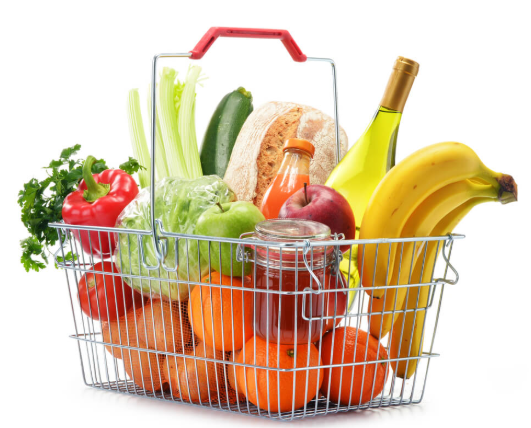


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv(r"../Market Basket Analysis/Market Basket Analysis - Groceries_dataset.csv")
df.head()

df.shape

(38765, 3)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [12]:
df.duplicated().sum()

759

In [13]:
df["Member_number"].nunique()

3898

In [14]:
df["Date"].nunique()

728

In [15]:
df["itemDescription"].nunique()

167

In [16]:
# convert the 'Date' column to datetime format
df['Date'] = df['Date'].astype('datetime64[ns]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [17]:
df.head()

,Member_number,Date,itemDescription
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [18]:
df.describe()

,Member_number,Date
count,38765.000000,38765
mean,3003.641868,2015-01-09 18:17:12.498387712
min,1000.000000,2014-01-01 00:00:00
25%,2002.000000,2014-07-12 00:00:00
50%,3005.000000,2015-01-21 00:00:00
75%,4007.000000,2015-07-10 00:00:00
max,5000.000000,2015-12-30 00:00:00
std,1153.611031,NaN


In [19]:
# from ydata_profiling import ProfileReport


# profile = ProfileReport(df, title="Profiling Report")
# profile

In [20]:
df.Date.min(), df.Date.max()

(Timestamp('2014-01-01 00:00:00'), Timestamp('2015-12-30 00:00:00'))

So we have data from January 2014 through to December 2015

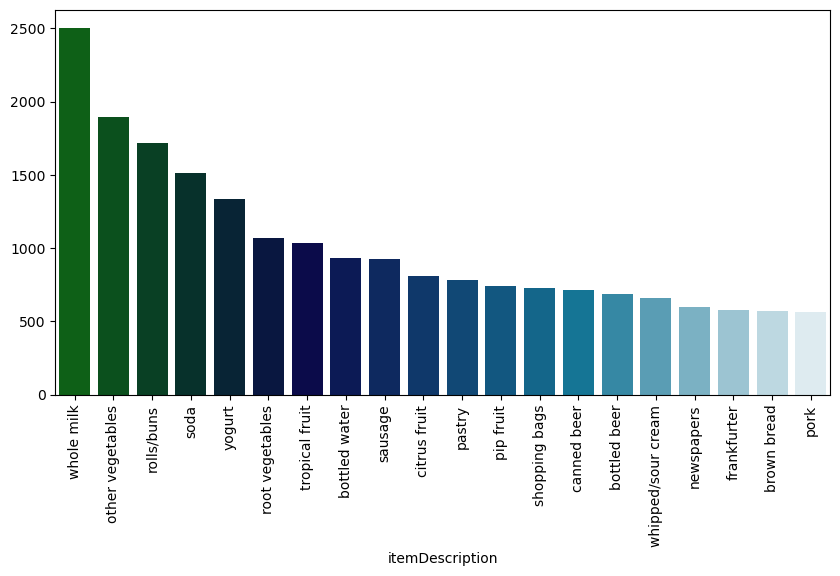

In [21]:
#most_purchased = df.itemDescription.value_counts().head(20)
plt.figure(figsize=(10, 5))

sns.barplot(x=df["itemDescription"].value_counts().head(20).index,y=df["itemDescription"].value_counts().head(20).values, data=df, palette="ocean")
plt.xticks(rotation=90)
plt.show()

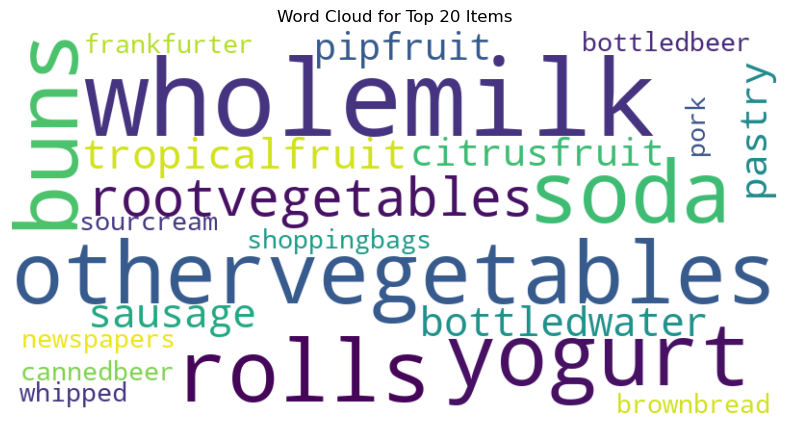

In [22]:
from wordcloud import WordCloud


top_items = df["itemDescription"].value_counts().head(20)

# Word cloud for the top 20 items

def remove(string):
    return string.replace(" ", "")


top_items = list(map(remove, list(top_items.index)))

top_items_text = ' '.join(top_items)
wordcloud = WordCloud(width=800, height=400, background_color='white', relative_scaling=0).generate(top_items_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Top 20 Items')
plt.show()


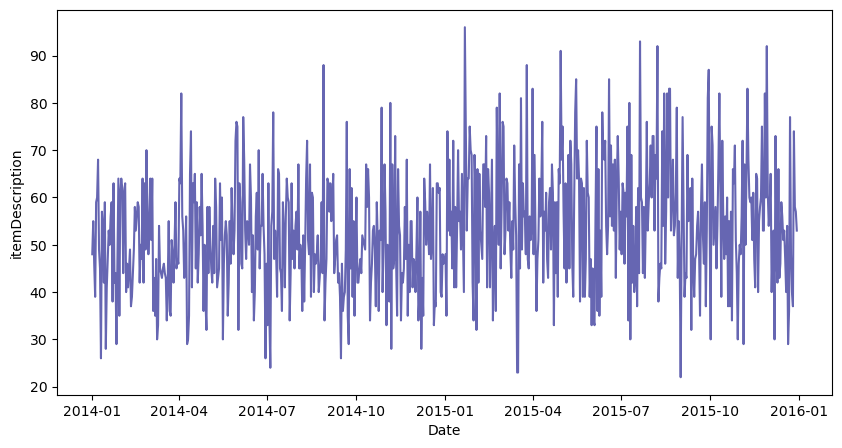

In [23]:
plt.figure(figsize=(10, 5))
a = df.groupby(["Date"]).agg({"itemDescription":"count"})
#sns.lineplot(kind="line", color="navy", alpha=0.6)
sns.lineplot(x="Date", y="itemDescription", data=a, color="navy", alpha=0.6)
plt.show()

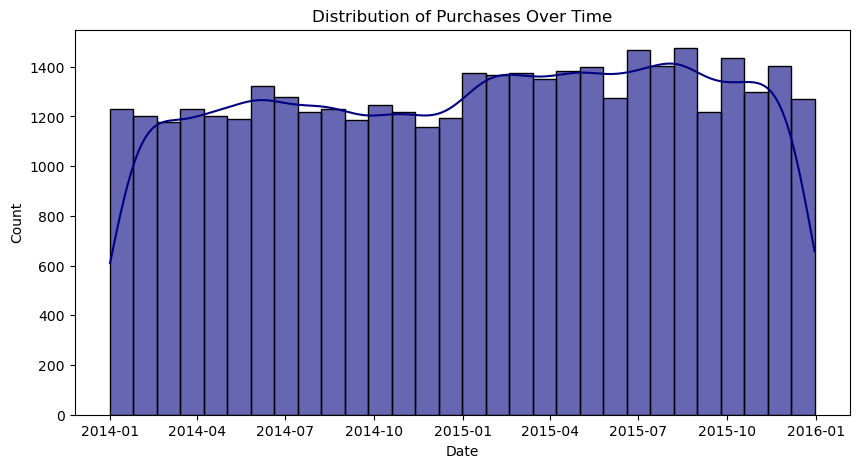

In [24]:
# Distribution of purchases over time
plt.figure(figsize=(10, 5))
sns.histplot(df['Date'], bins=30, kde=True, color="navy", alpha=0.6)
plt.title('Distribution of Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [25]:
df_year = df.groupby(["Date"]).agg({"itemDescription":"count"}).reset_index()
df_year = df_year.rename(columns ={"itemDescription": "purchased_count"})


In [26]:
# sns.catplot(x='Date',y='purchased_count',data=df_year,kind='bar',aspect=3)


In [27]:
df["year"] = df["Date"].dt.year
df["quarter"] = df["Date"].dt.quarter
df["month"] = df["Date"].dt.month

df.head()

,Member_number,Date,itemDescription,year,quarter,month
0,1808,2015-07-21,tropical fruit,2015,3,7
1,2552,2015-01-05,whole milk,2015,1,1
2,2300,2015-09-19,pip fruit,2015,3,9
3,1187,2015-12-12,other vegetables,2015,4,12
4,3037,2015-02-01,whole milk,2015,1,2


In [28]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
year                        int32
quarter                     int32
month                       int32
dtype: object

In [29]:
df2 = df.groupby(["year", "quarter", "month"]).agg({"itemDescription":"count"}).reset_index()
df2 = df2.rename(columns = {"itemDescription":"purchase_count"})
df2

,year,quarter,month,purchase_count
0,2014,1,1,1527
1,2014,1,2,1437
2,2014,1,3,1411
3,2014,2,4,1561
4,2014,2,5,1615
5,2014,2,6,1570
6,2014,3,7,1576
7,2014,3,8,1575
8,2014,3,9,1472
9,2014,4,10,1591


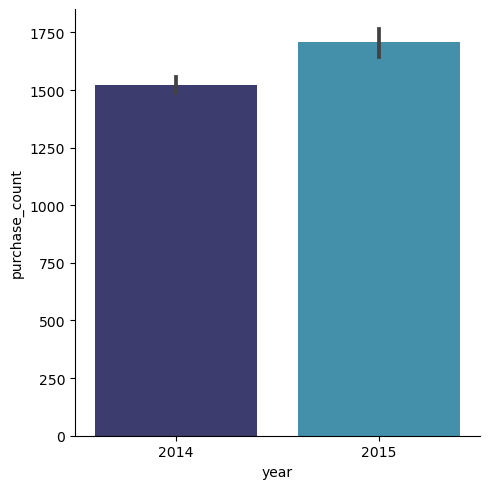

In [30]:
sns.catplot(x='year',y="purchase_count",data=df2,kind='bar', palette="ocean", alpha=0.8)
plt.show()

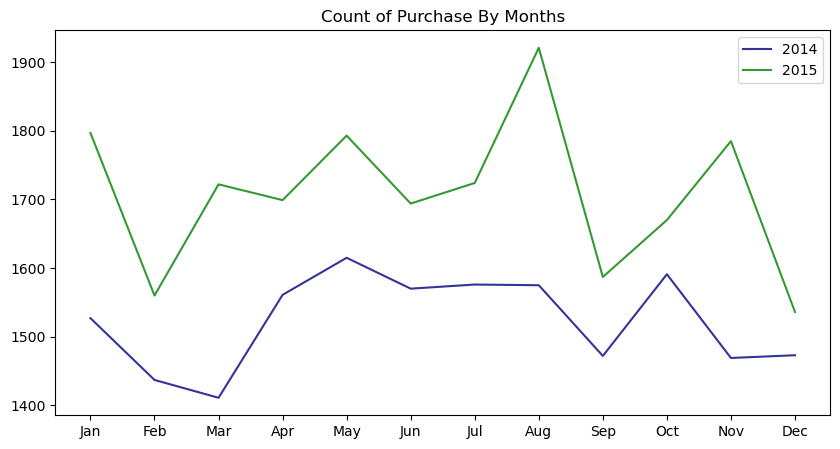

In [31]:
df2_2014 = df2.loc[df2["year"]== 2014]
df2_2015 = df2.loc[df2["year"] == 2015]


#sns.lineplot(x="month", y="purchase_count", data=df2_2014)
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.plot(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.8)
plt.plot(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.8)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

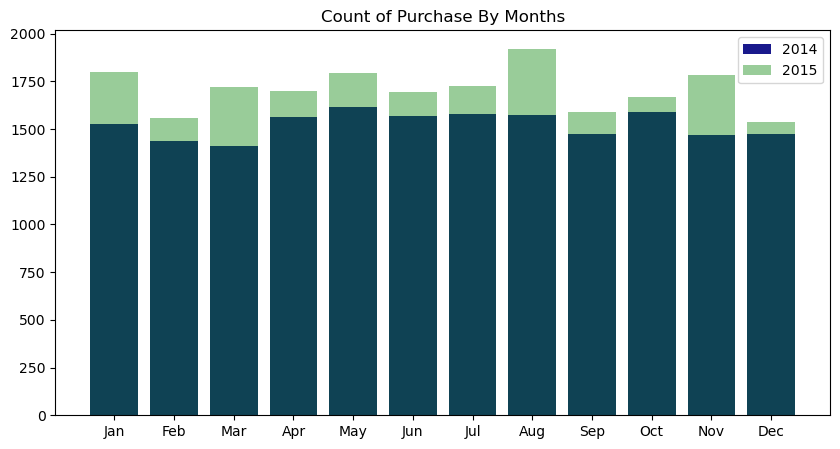

In [32]:
plt.figure(figsize=(10, 5))
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.bar(df2_2014["month"], df2_2014["purchase_count"], color="navy", label='2014', alpha =0.9)
plt.bar(df2_2015["month"], df2_2015["purchase_count"], color='g', label='2015', alpha=0.4)

plt.title("Count of Purchase By Months")
plt.xticks(df2_2014["month"],months)
plt.legend(loc="best") 
plt.show()

In [33]:
df2.groupby(["year"]).agg({"purchase_count":"mean"}).reset_index()

,year,purchase_count
0,2014,1523.083333
1,2015,1707.333333


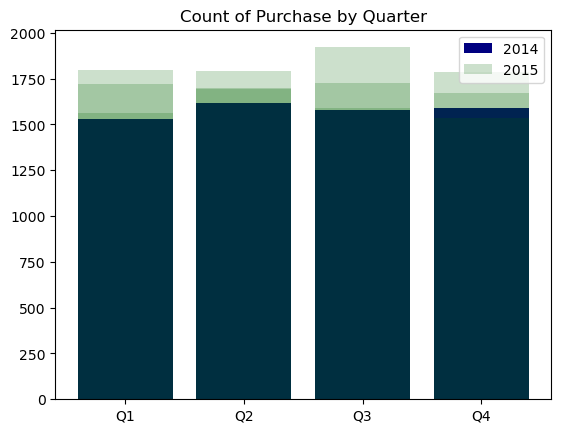

In [34]:
quarter = ["Q1", "Q2", "Q3", "Q4"]

plt.bar(df2_2014["quarter"], df2_2014["purchase_count"], color="navy", label='2014', alpha =1)
plt.bar(df2_2015["quarter"], df2_2015["purchase_count"], color='darkgreen', label='2015', alpha=0.2)

plt.title("Count of Purchase by Quarter")
plt.xticks(df2_2014["quarter"].unique(),quarter)
plt.legend(loc="best") 
plt.show()

In [35]:
df2.groupby(["year", "quarter"]).agg({"purchase_count":"mean"}).reset_index()

,year,quarter,purchase_count
0,2014,1,1458.333333
1,2014,2,1582.000000
2,2014,3,1541.000000
3,2014,4,1511.000000
4,2015,1,1693.000000
5,2015,2,1728.666667
6,2015,3,1744.000000
7,2015,4,1663.666667


## Market basket analysis

In [36]:
df.head()

,Member_number,Date,itemDescription,year,quarter,month
0,1808,2015-07-21,tropical fruit,2015,3,7
1,2552,2015-01-05,whole milk,2015,1,1
2,2300,2015-09-19,pip fruit,2015,3,9
3,1187,2015-12-12,other vegetables,2015,4,12
4,3037,2015-02-01,whole milk,2015,1,2


In [37]:
df.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
year                        int32
quarter                     int32
month                       int32
dtype: object

In [49]:
df_sorted =  df[["Member_number", "itemDescription"]].sort_values(by="Member_number", ascending=False)
df_sorted.head()

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables


In [50]:
#taking out whitespaces
df_sorted["itemDescription"] = df["itemDescription"].str.strip()

In [58]:
#to group each transaction

g = list(df_sorted.groupby(["Member_number"]))

In [59]:
for a, b in g:
    print(a)
    print(b)
    print("---------------------------------------------------")

(1000,)
       Member_number      itemDescription
18196           1000      misc. beverages
4843            1000              sausage
1629            1000                 soda
24544           1000               yogurt
32851           1000          salty snack
29480           1000               pastry
2047            1000          canned beer
22537           1000     hygiene articles
13331           1000           whole milk
17778           1000   pickled vegetables
6388            1000              sausage
20992           1000  semi-finished bread
8395            1000           whole milk
---------------------------------------------------
(1001,)
       Member_number     itemDescription
6612            1001                beef
9391            1001             sausage
364             1001         frankfurter
16513           1001                soda
32575           1001  whipped/sour cream
5695            1001         frankfurter
32727           1001          rolls/buns
27195           

       Member_number  itemDescription
14460           1243             soda
30609           1243  cling film/bags
---------------------------------------------------
(1244,)
       Member_number itemDescription
29302           1244            soda
31654           1244     soft cheese
26325           1244     salty snack
34392           1244   bottled water
15505           1244        UHT-milk
35214           1244   shopping bags
13153           1244           candy
10176           1244      rolls/buns
---------------------------------------------------
(1245,)
       Member_number   itemDescription
36086           1245              soda
884             1245            grapes
802             1245    tropical fruit
17033           1245  other vegetables
5108            1245              soda
36292           1245     shopping bags
32296           1245  processed cheese
15816           1245    condensed milk
20052           1245        rolls/buns
28113           1245       white bread
3903

       Member_number   itemDescription
18086           1414  other vegetables
1937            1414        whole milk
---------------------------------------------------
(1415,)
       Member_number        itemDescription
25774           1415          domestic eggs
9094            1415                sausage
25243           1415  fruit/vegetable juice
9625            1415                sausage
---------------------------------------------------
(1416,)
       Member_number           itemDescription
38185           1416     fruit/vegetable juice
1370            1416          other vegetables
4171            1416                   sausage
32640           1416                    pastry
20320           1416                    yogurt
28545           1416  long life bakery product
5159            1416          other vegetables
12396           1416               canned beer
17519           1416          other vegetables
36343           1416                       oil
9901            1416      

       Member_number    itemDescription
34115           1571             dishes
18439           1571         whole milk
8021            1571       bottled beer
13985           1571    misc. beverages
37432           1571             onions
30134           1571       bottled beer
24170           1571  frozen vegetables
2290            1571            sausage
---------------------------------------------------
(1572,)
       Member_number           itemDescription
27626           1572                 margarine
36760           1572             specialty bar
28310           1572                rolls/buns
21725           1572          other vegetables
6484            1572       specialty chocolate
37262           1572               white bread
6092            1572                      soda
5576            1572               frankfurter
9621            1572         finished products
33945           1572                      rice
22633           1572        whipped/sour cream
22241           

       Member_number itemDescription
5757            1744     canned beer
22139           1744    bottled beer
5990            1744   domestic eggs
21906           1744            soda
---------------------------------------------------
(1745,)
       Member_number itemDescription
28640           1745          yogurt
12491           1745  tropical fruit
---------------------------------------------------
(1746,)
       Member_number        itemDescription
18187           1746               UHT-milk
11225           1746        root vegetables
457             1746  Instant food products
2038            1746             whole milk
17987           1746          bottled water
1838            1746              pip fruit
27374           1746              margarine
29699           1746           cream cheese
13550           1746         tropical fruit
16606           1746              pip fruit
---------------------------------------------------
(1747,)
       Member_number     itemDescription

       Member_number        itemDescription
9448            1916           citrus fruit
35924           1916          domestic eggs
25597           1916             whole milk
18166           1916  fruit/vegetable juice
17820           1916                 yogurt
1671            1916                   curd
2017            1916              pip fruit
---------------------------------------------------
(1917,)
       Member_number itemDescription
15256           1917          pastry
3448            1917            pork
31187           1917     curd cheese
9169            1917     frankfurter
3064            1917         chicken
34755           1917      whole milk
25318           1917  red/blush wine
19597           1917          yogurt
19213           1917           herbs
15038           1917         sausage
31405           1917            curd
---------------------------------------------------
(1918,)
       Member_number itemDescription
6154            1918  tropical fruit
16819     

       Member_number   itemDescription
9422            2089              soda
37526           2089         margarine
2790            2089       canned beer
22800           2089      cream cheese
6651            2089        whole milk
32975           2089            pastry
3856            2089       canned beer
31918           2089       brown bread
22565           2089              curd
25571           2089  other vegetables
6416            2089            grapes
18939           2089       hard cheese
14630           2089      bottled beer
20005           2089          UHT-milk
30779           2089             pasta
15769           2089            grapes
---------------------------------------------------
(2091,)
       Member_number itemDescription
24556           2091    dish cleaner
36304           2091     canned beer
21269           2091           candy
6007            2091    citrus fruit
5120            2091       ice cream
8407            2091     brown bread
11811           20

       Member_number           itemDescription
30575           2256         frozen vegetables
19569           2256        whipped/sour cream
14426           2256                      beef
3420            2256                    pastry
530             2256  female sanitary products
16679           2256                      curd
14891           2256                    pastry
34727           2256             domestic eggs
31040           2256                    butter
---------------------------------------------------
(2257,)
       Member_number itemDescription
6398            2257            soda
18001           2257       pip fruit
16332           2257      whole milk
22547           2257          yogurt
1852            2257            pork
30439           2257           pasta
14290           2257  hamburger meat
183             2257           herbs
---------------------------------------------------
(2258,)
       Member_number    itemDescription
13306           2258  seasonal produc

       Member_number           itemDescription
2487            2416                    yogurt
1349            2416                 ice cream
26486           2416     fruit/vegetable juice
17498           2416  long life bakery product
10337           2416               butter milk
37055           2416                      bags
35375           2416                 margarine
18636           2416                    yogurt
34553           2416                    pastry
---------------------------------------------------
(2417,)
       Member_number itemDescription
33850           2417   spread cheese
38401           2417      newspapers
---------------------------------------------------
(2419,)
       Member_number        itemDescription
1299            2419                sausage
14435           2419             liver loaf
19083           2419             whole milk
30584           2419       processed cheese
34995           2419  fruit/vegetable juice
7331            2419         hambur

       Member_number           itemDescription
27696           2570           root vegetables
29128           2570             bottled water
6944            2570                      soda
36978           2570  long life bakery product
23093           2570                       oil
12979           2570                    yogurt
3207            2570          other vegetables
19356           2570             roll products
29755           2570             roll products
13606           2570          other vegetables
11547           2570    frozen potato products
---------------------------------------------------
(2571,)
       Member_number           itemDescription
30028           2571  long life bakery product
7055            2571               frankfurter
23204           2571                     sugar
13879           2571                    pastry
37326           2571                    yogurt
17688           2571            tropical fruit
1539            2571           root vegetables


       Member_number   itemDescription
28466           2732              soda
1343            2732           sausage
36820           2732       brown bread
8744            2732            grapes
24893           2732           berries
12317           2732       frozen fish
25628           2732           dessert
38543           2732           vinegar
17492           2732  other vegetables
9479            2732       salty snack
---------------------------------------------------
(2733,)
       Member_number itemDescription
14033           2733            soda
836             2733          yogurt
31458           2733   bottled water
16985           2733          yogurt
15309           2733      whole milk
30182           2733  red/blush wine
---------------------------------------------------
(2734,)
       Member_number     itemDescription
34808           2734          rolls/buns
19650           2734       shopping bags
3501            2734  whipped/sour cream
----------------------------

       Member_number            itemDescription
37895           2920               bottled beer
33344           2920                canned beer
32769           2920            root vegetables
16626           2920                hard cheese
477             2920                 whole milk
5596            2920                  beverages
29398           2920                 rolls/buns
989             2920               citrus fruit
13249           2920                  margarine
21745           2920  packaged fruit/vegetables
17138           2920                       beef
---------------------------------------------------
(2921,)
       Member_number      itemDescription
27047           2921        bottled water
34305           2921        specialty fat
37259           2921         cream cheese
29961           2921    frozen vegetables
10898           2921          hard cheese
33942           2921     other vegetables
27807           2921     other vegetables
11658           2921        

       Member_number   itemDescription
10862           3109  other vegetables
27011           3109            coffee
34269           3109       brown bread
8993            3109           sausage
25157           3109       canned beer
1983            3109          cat food
9008            3109    tropical fruit
25142           3109     specialty bar
18132           3109              soda
---------------------------------------------------
(3110,)
       Member_number         itemDescription
26739           3110                   herbs
38471           3110   Instant food products
35628           3110                 cereals
28394           3110  frozen potato products
10590           3110         root vegetables
12245           3110        processed cheese
---------------------------------------------------
(3111,)
       Member_number    itemDescription
27944           3111           UHT-milk
16982           3111         whole milk
27147           3111             grapes
23305          

       Member_number        itemDescription
3242            3297                sausage
25689           3297                 butter
17040           3297                   meat
9540            3297             whole milk
13934           3297       processed cheese
37381           3297               cat food
25149           3297                 yogurt
34064           3297           frozen meals
19391           3297                dessert
9000            3297         tropical fruit
30083           3297  fruit/vegetable juice
891             3297       other vegetables
---------------------------------------------------
(3298,)
       Member_number itemDescription
25849           3298       margarine
17413           3298           herbs
1264            3298     canned beer
8084            3298         sausage
21760           3298      whole milk
24233           3298       chocolate
5611            3298    citrus fruit
9700            3298      whole milk
4532            3298   roll product

       Member_number        itemDescription
287             3495     liquor (appetizer)
32182           3495                    oil
21143           3495             whole milk
33484           3495  fruit/vegetable juice
4994            3495             white wine
38035           3495      canned vegetables
16649           3495        root vegetables
16436           3495            hard cheese
37635           3495       hygiene articles
20040           3495                   pork
500             3495             whole milk
3891            3495            canned beer
16033           3495          sliced cheese
37896           3495                  candy
36178           3495             rolls/buns
22701           3495                  candy
33345           3495          domestic eggs
31953           3495                    oil
6552            3495                   beef
15804           3495             whole milk
33084           3495                 pastry
32498           3495            

       Member_number itemDescription
19447           3640      white wine
22883           3640   domestic eggs
6734            3640      rolls/buns
32327           3640          coffee
3298            3640       pip fruit
2351            3640   bottled water
34605           3640      whole milk
18500           3640          pastry
---------------------------------------------------
(3641,)
       Member_number  itemDescription
19256           3641     frozen meals
28212           3641      soft cheese
26229           3641    bottled water
12063           3641  root vegetables
3107            3641    bottled water
10080           3641      white bread
---------------------------------------------------
(3642,)
       Member_number           itemDescription
9589            3642                      pork
23966           3642          other vegetables
10681           3642            tropical fruit
23612           3642                rolls/buns
7463            3642                   sausage

       Member_number  itemDescription
16321           3795           yogurt
9690            3795           yogurt
10173           3795  misc. beverages
35211           3795            sugar
26322           3795      hard cheese
34389           3795            herbs
25839           3795        pip fruit
172             3795     bottled beer
---------------------------------------------------
(3796,)
       Member_number    itemDescription
6183            3796  seasonal products
22332           3796       bottled beer
---------------------------------------------------
(3797,)
       Member_number        itemDescription
752             3797       other vegetables
19202           3797                  cream
3053            3797                sausage
16007           3797         tropical fruit
30568           3797             whole milk
12253           3797    semi-finished bread
14419           3797                waffles
7020            3797             whole milk
22033           3797  

       Member_number        itemDescription
10424           3973                 turkey
17029           3973                 coffee
19902           3973                 butter
3753            3973        root vegetables
4474            3973              pip fruit
8026            3973            canned beer
26573           3973  fruit/vegetable juice
24175           3973                 coffee
35462           3973          domestic eggs
30363           3973     pickled vegetables
32584           3973               cat food
16522           3973                   curd
14214           3973       other vegetables
880             3973                   curd
373             3973             rolls/buns
20623           3973       hygiene articles
---------------------------------------------------
(3974,)
       Member_number itemDescription
2378            3974     frankfurter
6392            3974         sausage
29310           3974   bottled water
22541           3974            curd
13161  

       Member_number  itemDescription
31946           4150          dessert
31773           4150     cream cheese
35235           4150    baking powder
34413           4150   red/blush wine
17758           4150           pastry
1609            4150   tropical fruit
15797           4150      brown bread
3884            4150       whole milk
20033           4150           pastry
15624           4150  root vegetables
26346           4150   tropical fruit
10197           4150     bottled beer
---------------------------------------------------
(4151,)
       Member_number itemDescription
22123           4151      whole milk
5974            4151      whole milk
---------------------------------------------------
(4152,)
       Member_number        itemDescription
9763            4152         hamburger meat
22847           4152                  sugar
32102           4152           bottled beer
25912           4152         condensed milk
7167            4152                sausage
90         

       Member_number itemDescription
38154           4309     white bread
33603           4309         waffles
18039           4309            salt
1890            4309      whole milk
---------------------------------------------------
(4310,)
       Member_number      itemDescription
28730           4310        bottled water
1540            4310            pip fruit
17689           4310               spices
27517           4310           whole milk
12581           4310                candy
38611           4310       red/blush wine
11368           4310  specialty chocolate
---------------------------------------------------
(4311,)
       Member_number    itemDescription
25761           4311         newspapers
35741           4311  frozen vegetables
9612            4311       frozen meals
10703           4311              candy
26852           4311      roll products
---------------------------------------------------
(4312,)
       Member_number           itemDescription
8981        

       Member_number     itemDescription
34843           4477  whipped/sour cream
13845           4477    other vegetables
29994           4477          newspapers
37292           4477             dessert
33975           4477         chewing gum
19685           4477          whole milk
3536            4477      hamburger meat
---------------------------------------------------
(4478,)
       Member_number    itemDescription
32668           4478  seasonal products
31945           4478      domestic eggs
38128           4478               rice
33577           4478      roll products
4199            4478               soda
20032           4478         newspapers
15796           4478         whole milk
20348           4478      bottled water
3883            4478           UHT-milk
---------------------------------------------------
(4479,)
       Member_number      itemDescription
30672           4479                 soda
28826           4479              waffles
27891           4479      

       Member_number        itemDescription
26058           4653             rolls/buns
9821            4653              ice cream
9909            4653  fruit/vegetable juice
25970           4653                 yogurt
---------------------------------------------------
(4654,)
       Member_number     itemDescription
26539           4654  whipped/sour cream
11168           4654          rolls/buns
13431           4654     root vegetables
10390           4654              grapes
35428           4654                soda
27317           4654   frozen vegetables
29580           4654       shopping bags
---------------------------------------------------
(4655,)
       Member_number   itemDescription
8069            4655      citrus fruit
25028           4655               oil
4517            4655              meat
729             4655        whole milk
8879            4655              beef
20666           4655         pip fruit
24218           4655  other vegetables
16878           4655

       Member_number    itemDescription
29938           4838  frozen vegetables
12767           4838     flower (seeds)
28916           4838              honey
17686           4838       cream cheese
1537            4838        frankfurter
37236           4838             yogurt
33919           4838        brown bread
13789           4838               soda
---------------------------------------------------
(4839,)
       Member_number            itemDescription
18957           4839            root vegetables
26209           4839              sweet spreads
25962           4839                     onions
492             4839                 whole milk
16641           4839              shopping bags
9813            4839                    sausage
2808            4839                     pastry
10060           4839  packaged fruit/vegetables
---------------------------------------------------
(4840,)
       Member_number           itemDescription
11042           4840                    o

In [62]:
transactions = [i[1]["itemDescription"].tolist() for i in g]
transactions

[['misc. beverages',
  'sausage',
  'soda',
  'yogurt',
  'salty snack',
  'pastry',
  'canned beer',
  'hygiene articles',
  'whole milk',
  'pickled vegetables',
  'sausage',
  'semi-finished bread',
  'whole milk'],
 ['beef',
  'sausage',
  'frankfurter',
  'soda',
  'whipped/sour cream',
  'frankfurter',
  'rolls/buns',
  'soda',
  'white bread',
  'whole milk',
  'whole milk',
  'curd'],
 ['specialty chocolate',
  'butter',
  'whole milk',
  'butter milk',
  'tropical fruit',
  'sugar',
  'other vegetables',
  'frozen vegetables'],
 ['dental care',
  'rolls/buns',
  'rolls/buns',
  'frozen meals',
  'rolls/buns',
  'sausage',
  'detergent',
  'root vegetables'],
 ['frozen fish',
  'shopping bags',
  'hygiene articles',
  'rolls/buns',
  'whole milk',
  'canned beer',
  'root vegetables',
  'tropical fruit',
  'whole milk',
  'chocolate',
  'other vegetables',
  'red/blush wine',
  'pastry',
  'rolls/buns',
  'packaged fruit/vegetables',
  'dish cleaner',
  'pip fruit',
  'other ve

In [63]:
df.groupby(['Member_number', 'itemDescription'])['itemDescription'].count()#.unstack().reset_index().fillna(0).set_index('Member number')

Member_number  itemDescription    
1000           canned beer            1
               hygiene articles       1
               misc. beverages        1
               pastry                 1
               pickled vegetables     1
                                     ..
5000           onions                 1
               other vegetables       1
               root vegetables        1
               semi-finished bread    1
               soda                   1
Name: itemDescription, Length: 34766, dtype: int64